**GETTING** **DATA**

In [0]:
from sklearn import datasets
from sklearn.datasets import fetch_openml

In [0]:
mnist=fetch_openml('mnist_784')

In [0]:
X,Y=mnist['data'],mnist['target']

In [0]:
#X[0] #1d numpy array .inorder to see img we need to convert it to 28*28

In [0]:
X.shape  #784 features bec 28*28 picxels

(70000, 784)

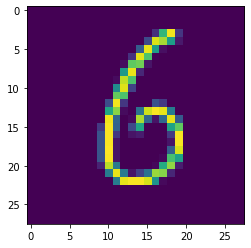

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
certain_digit=X[18]
certain_digit_img=certain_digit.reshape(28,28) #need to reshape to get the plot of image
plt.imshow(certain_digit_img,interpolation="nearest")

In [0]:
Y[18]

'6'

In [0]:
X_train,X_test=X[:60000],X[60000:]   #dataset is split into train n test 
Y_train,Y_test=Y[:60000],Y[60000:]

In [0]:
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train,Y_train=X_train[shuffle_index],Y_train[shuffle_index]

In [0]:
#normalising

X_train = X_train / 255
X_test = X_test / 255

**ENCODING**

In [0]:
from keras.utils import to_categorical
num_classes = 10                                    #0 to 9  so num_classes is 10  #encoding: ex. 4=0000100000
train_labels_en = to_categorical(Y_train,num_classes)
test_labels_en = to_categorical(Y_test,num_classes)
train_labels_en.shape, test_labels_en.shape

((60000, 10), (10000, 10))

**creating the ann**

In [0]:
from keras.models import Sequential #ANN Architecture
from keras.layers import Dense #layers in ANN


In [0]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=784))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [0]:
#loss function to measure working of model than improves with optimizer
model.compile(
    optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']
)

In [0]:
#training
model.fit(X_train,train_labels_en,epochs=6,batch_size=30)          #ie. 6 itterations over entire dataset and 30 samples per  gradient update

Epoch 1/6
60000/60000 [==============================] - 3s 58us/step - loss: 0.2729 - accuracy: 0.9191
Epoch 2/6
60000/60000 [==============================] - 3s 53us/step - loss: 0.1200 - accuracy: 0.9641
Epoch 3/6
60000/60000 [==============================] - 3s 55us/step - loss: 0.0888 - accuracy: 0.9730
Epoch 4/6
60000/60000 [==============================] - 3s 53us/step - loss: 0.0696 - accuracy: 0.9787
Epoch 5/6
60000/60000 [==============================] - 3s 54us/step - loss: 0.0574 - accuracy: 0.9818
Epoch 6/6
60000/60000 [==============================] - 3s 56us/step - loss: 0.0479 - accuracy: 0.9844


In [0]:
#Evaluate the model
model.evaluate(X_test,test_labels_en)

10000/10000 [==============================] - 0s 27us/step


[0.10282958955916692, 0.9704999923706055]

In [0]:
#predictions

predictions=model.predict(X_test[2:8])
print(predictions)            #in terms of probabilities

[[4.04601678e-06 9.98829901e-01 1.38152638e-04 1.29201493e-04
  2.05715241e-05 6.86433623e-06 8.09257745e-06 1.61912089e-04
  5.88145980e-04 1.13102615e-04]
 [9.99989986e-01 1.16521459e-09 4.47133380e-06 5.01488444e-07
  1.28884536e-09 6.68934963e-10 1.82495990e-06 8.02198258e-07
  1.97827532e-08 2.39560222e-06]
 [1.02450911e-04 3.13542046e-07 1.36992313e-07 2.44098053e-09
  9.98322785e-01 9.64796953e-09 3.52065008e-08 5.77768014e-06
  6.03603155e-07 1.56790251e-03]
 [7.25689091e-08 9.99949455e-01 2.04508851e-07 8.39958830e-07
  2.39190058e-06 7.24231342e-09 2.95829783e-09 4.27353152e-05
  2.05668584e-06 2.17718775e-06]
 [2.63852172e-07 7.75816829e-07 2.34788260e-07 5.72230476e-07
  9.98783767e-01 5.41067436e-07 9.51310213e-08 6.73053137e-06
  1.14798197e-03 5.90778582e-05]
 [8.74088388e-12 5.15378096e-09 3.90503081e-11 3.51025228e-05
  2.65077324e-06 7.40996242e-08 6.22945153e-17 3.31915930e-06
  1.97398387e-09 9.99958873e-01]]


In [0]:
#finding the actual no. predicted
print(np.argmax(predictions,axis=1))
#actual test labels
print(Y_test[2:8])

[1 0 4 1 4 9]
[1 0 4 1 4 9]
